In [ ]:
# La fonction train avec Stochoastic Gradient Descent
def TrainSGD(x, y, lr, epoch):
    m = len(y)
    x = add_ones(x.values)
    theta = np.zeros(x.shape[1])
    cost_history = np.zeros(epoch)

    for i in range(epoch):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            x_sample = x[rand_index, :]
            y_sample = y[rand_index]
            error = x_sample.dot(theta) - y_sample
            gradient = x_sample * error
            theta_new = theta - lr * gradient
            theta = theta_new

        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

In [ ]:
# Correction
def Train(self, X, y):
    m = len
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    
    self.cost_history = np.zeros(self.epoch)
    for i in range(self.epoch):
        np.random.seed(3)
        perm = np.random.permutation(len(X_train))
        X = X[perm]
        y = y.iloc[perm]
        for j in range(len(X)):
            theta_new = self.theta - self.lr*X[j].T.dot(X[j].dot(self.theta) - y.iloc[j])
            self.theta = theta_new 
            self.cost_history[i] = self.compute_cost(X, y,self.theta)
            
    return  self.theta, self.cost_history

---
<center><h2> 2. Reprendre la regression linéaire avec scikit-learn. </h2></center>

In [61]:
# Importer les bibliothèques nécessaires :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Lire le fichier `data.xlsx` et sauver son contenu dans la varisble `data`
data = pd.read_excel("data.xlsx")

# Afficher le dataframe
data.head ()

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [63]:
# Récuperer la colonne à prédire Y
Y = data.pop('Y')

# Selectionner les colonnes sur lesquelles notre prédiction séra basée
X = data.values

# Afficher les features
# display (y)
# display (X)

In [64]:
# Partager les données en deux parties : une pour l'apprentissage (train) et une autre pour le test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

print ()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

7176
2392
7176
2392

(7176, 4)
(7176,)
(2392, 4)
(2392,)


In [65]:
# Créer le model 
lin_regr = LinearRegression()

# On fit (entraine) le modele (apprentissage)
lin_regr.fit(X_train, Y_train)

# Prédir la valeur de Y
y_predict = lin_regr.predict(X_test)

# Afficher la valeur prédite
display(y_predict)

array([473.58323042, 449.40098273, 480.83788048, ..., 453.72815064,
       488.37988224, 436.78684399])

In [66]:
# Mean Squared Error (mse) : l'erreur moyenne au carrée
mse = mean_squared_error (Y_test, y_predict)
print ("Mean Squared Error :", mse)

# Root Mean Squared Error (rmse) : la racine carrée de l'erreur moyenne au carrée
rmse = np.sqrt(mse)
print ("Root Mean Squared Error", rmse)

Mean Squared Error : 21.404652098221344
Root Mean Squared Error 4.626516194527081


Text(0, 0.5, 'Actual')

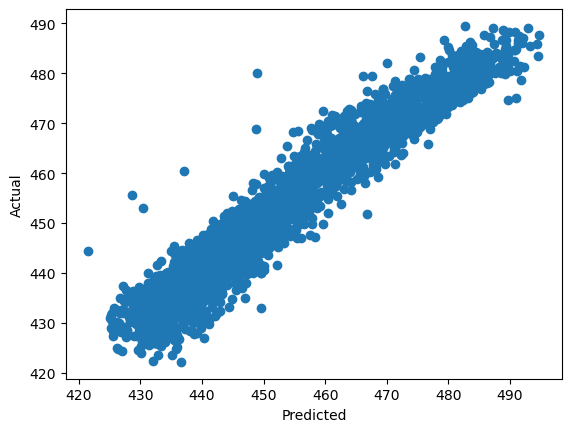

In [69]:
# Choix du graph
pylab.scatter(y_predict, Y_test)
# pylab.scatter(Y_test, y_predict)

# Labels
pylab.xlabel('Predicted')
pylab.ylabel('Actual')

---
<center><h2> 3. Reprendre la regression logistique avec scikit-learn. </h2></center>

In [70]:
# Importer les bibliothèques
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.special import expit

In [71]:
# Charger les données du fichier diabetes.csv
data = pd.read_csv("diabetes.csv")
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
# Récuperer les colonnes sur lesquelles la prédiction sera faite dans X et celle à rédire dans Y
X = data.drop ("Outcome", axis = 1)
Y = data [["Outcome"]]

In [73]:
# Séparer les données : celles d'apprentissage d'un côté et celles de test d'un autre côté 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state = 7)

In [74]:
# Créer le modèle : Regression Logistique
log_regr = LogisticRegression ()
log_regr.fit (X_train, Y_train)

/home/hassane/miniconda3/envs/av/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hassane/miniconda3/envs/av/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
# Prédire les valeurs de Y
y_predict = log_regr.predict (X_test)
y_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

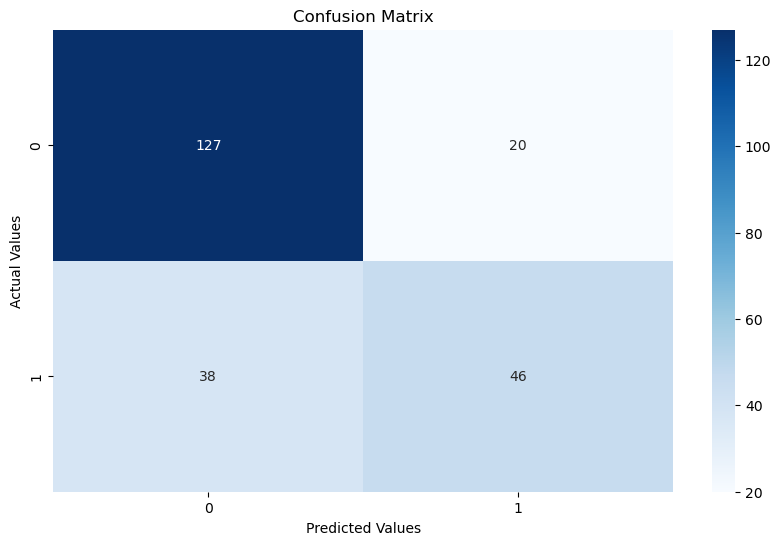

In [78]:
# plt.plot(X_test, y_predict, color='red')

# 

conf_mat = metrics.confusion_matrix (Y_test, y_predict)

# Représentation graphique de la matrice de confusion
plt.figure (figsize = (10,6))
plt.title ("Matrice de confudsion")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')